# Implementing the gradient descent algorithm
I have implemented the basic functions of the gradient descent algorithm to find the boundary in a small dataset. Here, I have defiend some functions that will help us plot and visualize the data.

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### functions for plotting and displaying the points

In [2]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    
def display(m, b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

### reading and plotting the data

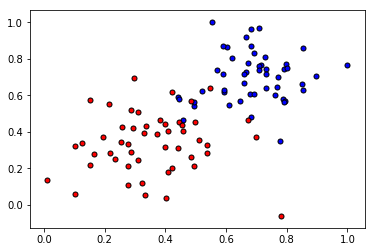

In [4]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

### defining functions for update weights, sigmoid func

In [7]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return (-1*y)*np.log(output) - (1-y)*np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    weight = weights + learnrate*(y - output_formula(x, weights, bias))*x
    bias = bias + learnrate*(y - output_formula(x, weights, bias))
    return weight, bias

### Training function


========== Epoch 0 ==========
Train loss:  1.0038029607728887
Accuracy:  0.45

========== Epoch 10 ==========
Train loss:  0.7298669401171872
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.6387457686420076
Accuracy:  0.55

========== Epoch 30 ==========
Train loss:  0.5671626407803649
Accuracy:  0.72

========== Epoch 40 ==========
Train loss:  0.5112787957135958
Accuracy:  0.81

========== Epoch 50 ==========
Train loss:  0.46707644920537333
Accuracy:  0.86

========== Epoch 60 ==========
Train loss:  0.43155915831742137
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.40256149848460127
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.378526104260742
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3583258927116663
Accuracy:  0.94


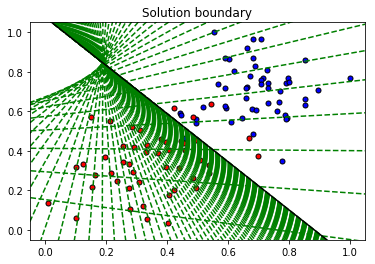

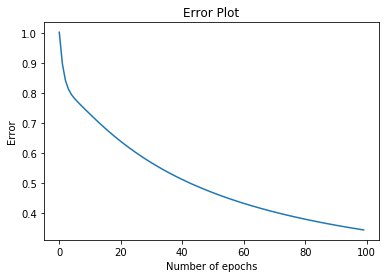

In [10]:
epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines = False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    
train(X, y, epochs, learnrate, True)

### Results
we obtain:
* 10 updates with the current training loss and accuracy
* a plot showing the shifting of the line
* a plot of the error function